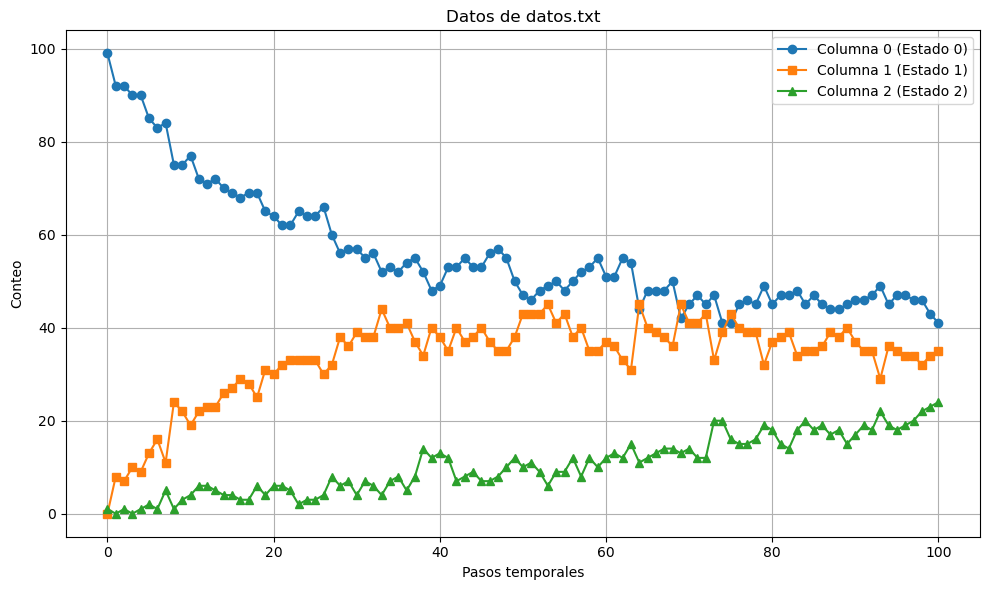

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar los datos desde un archivo .txt
def cargar_datos(nombre_archivo):
    """
    Carga un archivo de texto con tres columnas de datos.
    Retorna las columnas como arrays separados.
    """
    datos = np.loadtxt(nombre_archivo)
    columna_0 = datos[:, 0]
    columna_1 = datos[:, 1]
    columna_2 = datos[:, 2]
    return columna_0, columna_1, columna_2

# Función para graficar las tres columnas
def graficar_datos(columna_0, columna_1, columna_2, nombre_archivo):
    """
    Genera un gráfico de las tres columnas de datos.
    """
    x = np.arange(len(columna_0))  # Índices para el eje x (número de pasos temporales)
    
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico

    # Graficar las columnas
    plt.plot(x, columna_0, label='Columna 0 (Estado 0)', marker='o')
    plt.plot(x, columna_1, label='Columna 1 (Estado 1)', marker='s')
    plt.plot(x, columna_2, label='Columna 2 (Estado 2)', marker='^')

    # Personalizar el gráfico
    plt.title(f"Datos de {nombre_archivo}")
    plt.xlabel("Pasos temporales")
    plt.ylabel("Conteo")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Nombre del archivo .txt (asegúrate de reemplazarlo con el nombre correcto)
nombre_archivo = "datos.txt"

# Cargar los datos del archivo
try:
    columna_0, columna_1, columna_2 = cargar_datos(nombre_archivo)

    # Graficar los datos
    graficar_datos(columna_0, columna_1, columna_2, nombre_archivo)

except Exception as e:
    print(f"Error al cargar o procesar el archivo: {e}")